
    
<h3>Project Guide:</h3>

<a href='' style="text-decoration: none">Fathima Anwar</a>
    
<h3>Working team:</h3>
    
<a href='https://www.linkedin.com/in/sabah-sayed-k/' style="text-decoration: none">Sabah Sayed k</a>
    
<a href='' style="text-decoration: none">Shahul</a>
    
<a href='' style="text-decoration: none">Shahbas</a>

<a href='' style="text-decoration: none">Razeen Abdul Gafoor</a>

    
    
    
    
    
    

<h1><span style='color:#b846a3;font-family:Comic Sans MS'>Main Goal:</span></h1>

In this notebook, we will  :

- **Predict whether or not a student will pass the exam based on certain information given**
- **Compare the four learning algorithms**
- **Find the best algorithm with high accuracy**

We will be using three learning algorithms:

- **Logistic regression**
- **Supported vector machine**
- **Decision Tree**
- **Random forest**


<h1><span style='color:#b846a3;font-family:Comic Sans MS'>About Dataset:</span></h1>

Source of Dataset : **MEA ENGINEERNG COLLEGE,PERINTHALANNA** 

**Now let's explain every column in the dataframe**
- `Gender` : student's sex (binary: "0" - female or "1" - male)
- `age` : student's age (numeric: from 18 to 22)
- `sslc` : percentage(numeric: 0 -9)fig given below
- `plustwo` : percentage(numeric: 0 -9)fig given below
- `realtionship` :(binary: "0" - commited or "1" - single)
- `Annual income` :binary : 1- "above one lakh", 0 - "below one lakh"
- `Frequent sickness` :(binary: yes "1" or no "0")
- `Assignment submission` : Assigment submisson status numeric:1"after the deadline",2"deadline",3"before the deadline")
- `self learner` : (binary: yes "1" or no "0")
- `studyhour` : study time (numeric: 0 - <15 minute,1 - <= 30minute, 2 - <=1hour, 3 - <= 1.5hour,4 - <=2hour,5 - <=2.5hour,6 - >=3hour)
- `pcm` : percentage(numeric: 0 -9)fig given below
- `sleephour` : sleeping hour(numeric: 0 - 0 to 2hour , 1 - <=3hour, 2 - <=4hour,  3 - <=5hour,4 - <=6hour,5 - <= 7hour , 8- >7hour,)
- `interstinbtechstudies` :(binary: yes "1" or no "0")
- `instareelsspends` :reels spending time (numeric: 0 - <30 min., 1 - 30 to 1 hour., 2 - 1hour. to 1.30 hour,  3 -1.30 to 2 hour,4-2 hour to 3 hour,5 -3hour>)
- `activities` : extra-curricular activities (binary: yes or no)
- `exam fear` : (binary: yes "1" or no "0")
- `Studypreparation` : numeric(1 -"day" ,2- "week",3 - "month")
- `Programming`: programming interest (binary: yes "1" or no "0")


**The last column:**
- `Pass` : did the student pass the first year exam without supplie or not (binary: yes or no)

<img src='images\x&xi.png' width="600" height="600">

# Explore Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
import joblib

In [2]:
df = pd.read_csv('newdatset.csv')
df.head()

,sslc,plustwo,sleep hour,studyhour,interest of btech studies?,Assignment submission,Exam fear,PCM Mark,insta reels,Gender,Relationship,self learner,frequent sickness,Extracurricularactivity,studypreparation,Pass,pass or fail,programming
0,9,8,5,6,1,2,0,5,1,1,1,1,0,1,2,1,pass,1
1,9,8,5,6,1,3,0,8,0,1,1,1,0,1,2,1,pass,1
2,9,5,5,2,1,2,1,5,0,0,1,1,0,1,2,0,fail,1
3,7,7,4,4,1,2,1,6,5,0,1,0,0,0,3,1,pass,1
4,1,2,3,1,0,2,1,1,0,1,0,0,1,1,1,0,fail,0


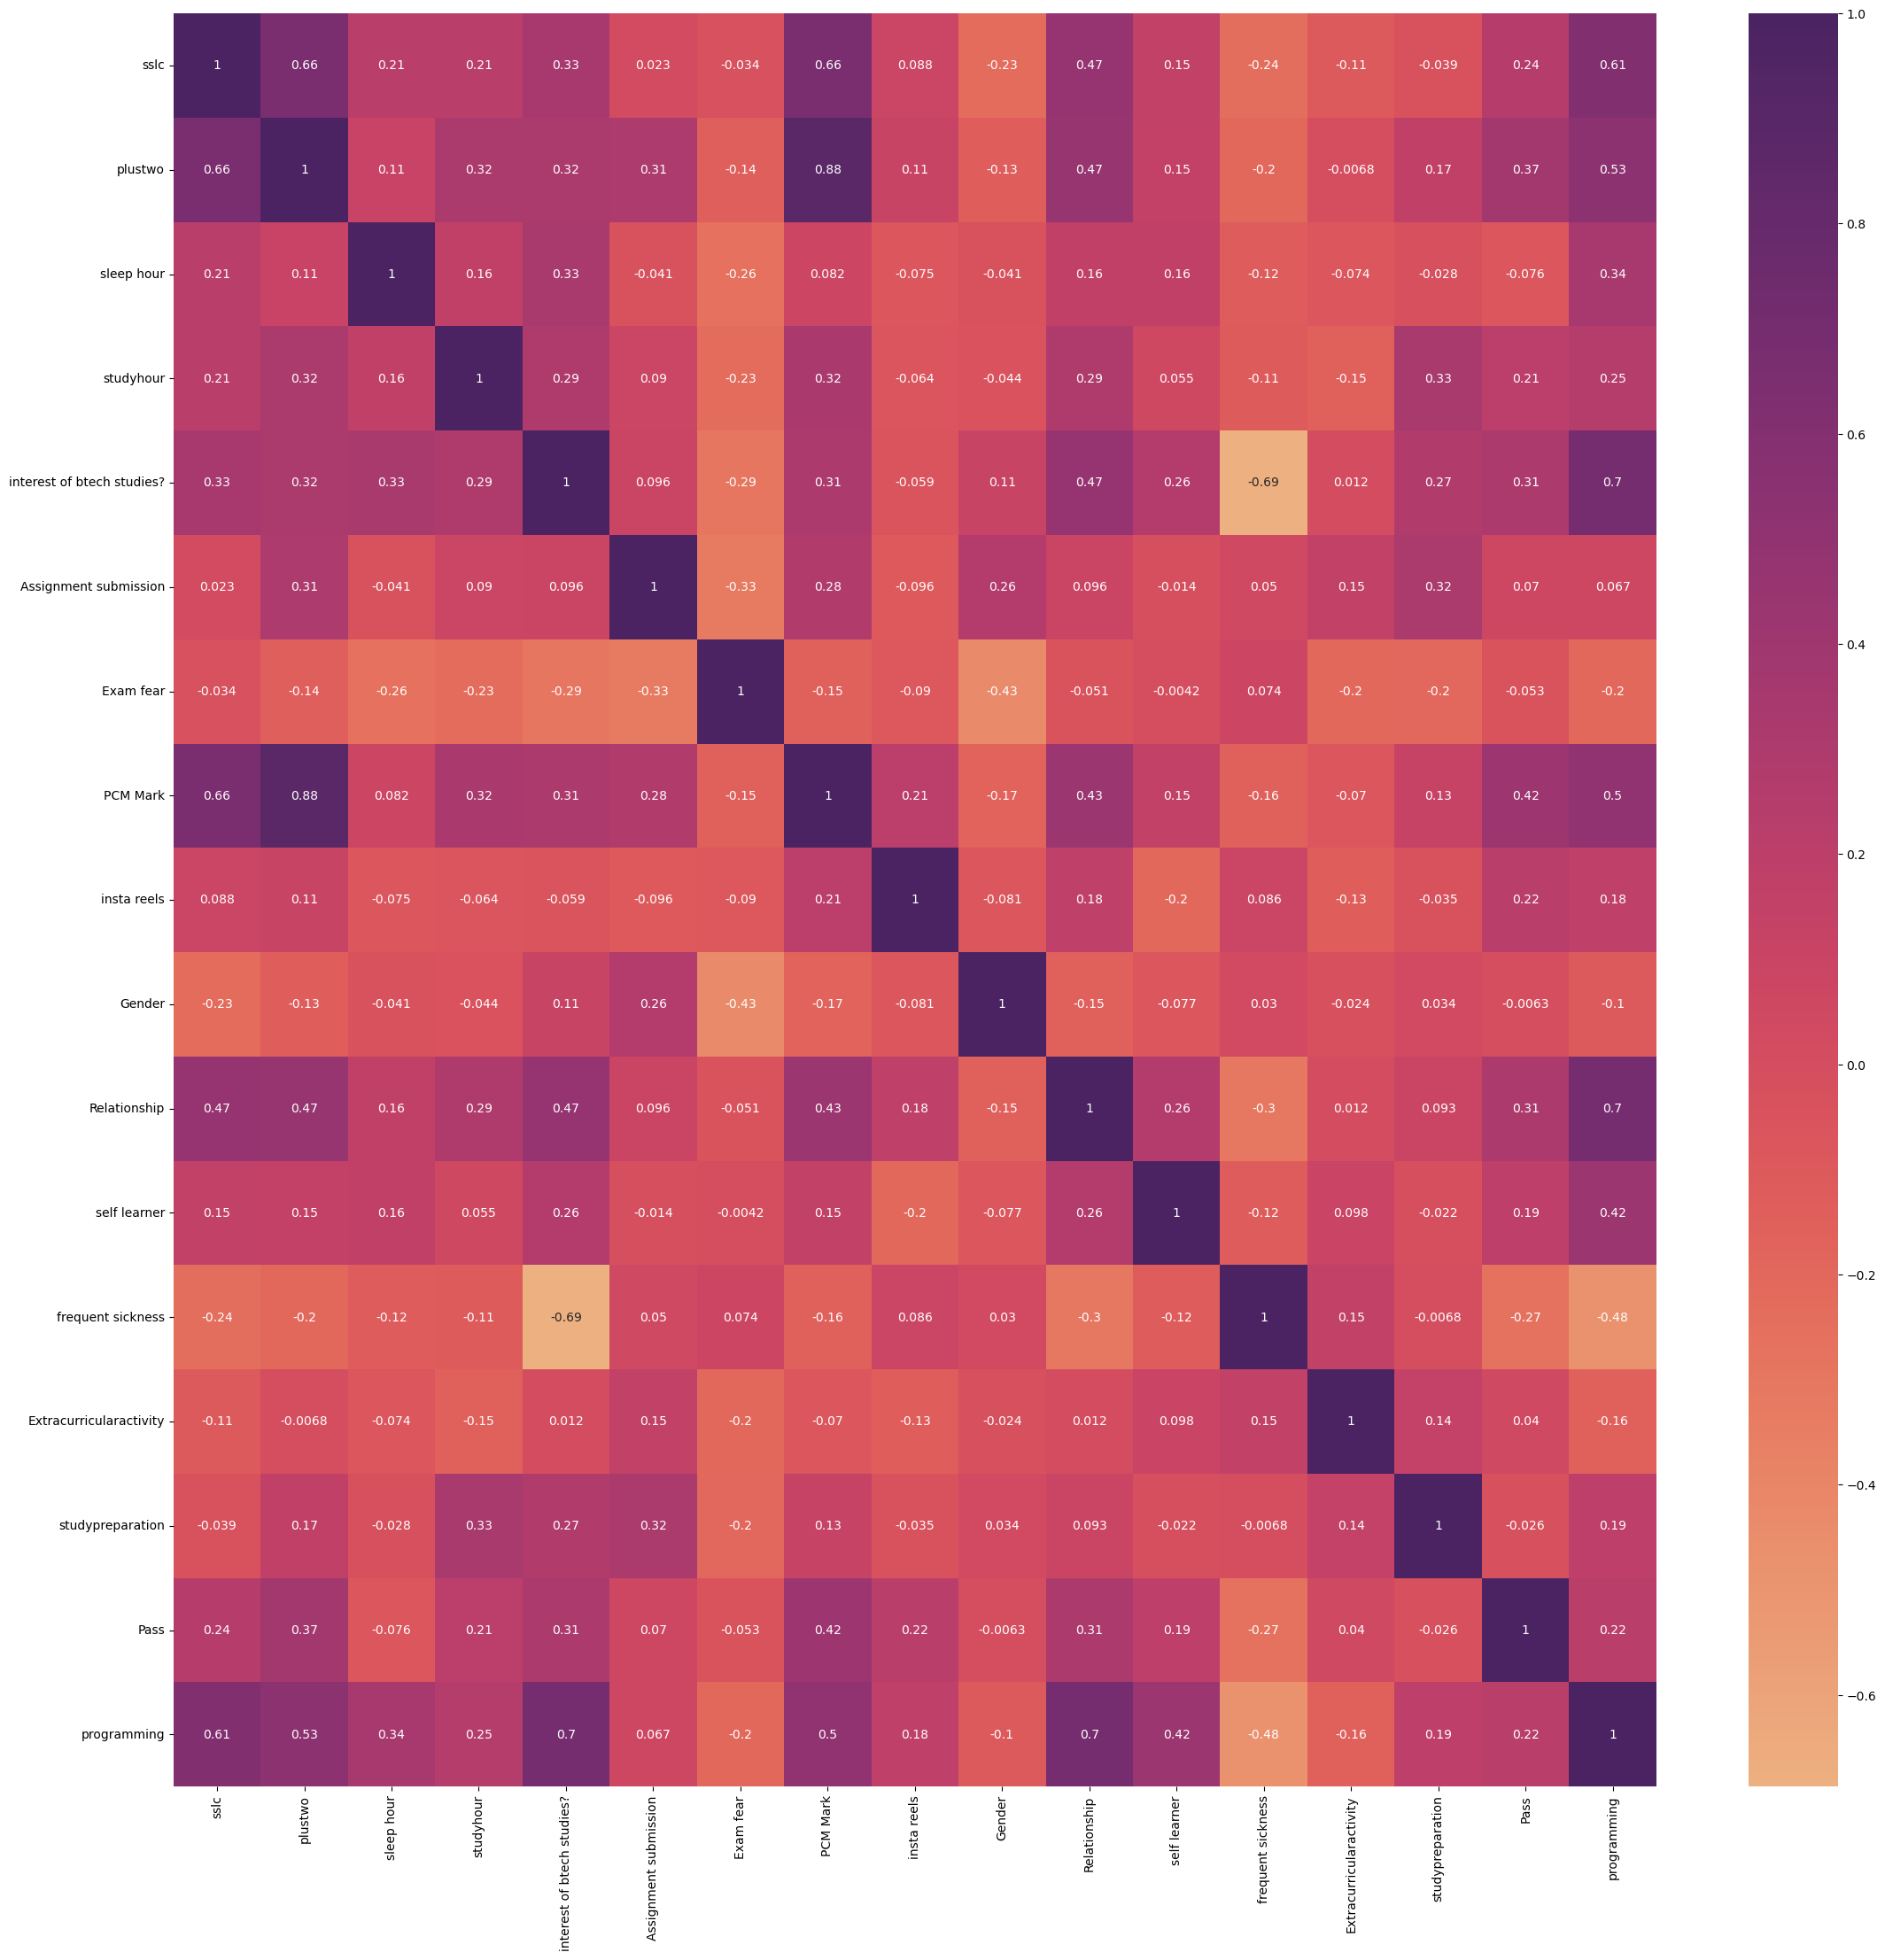

In [6]:
cor = df.corr()
plt.figure(figsize = (27,26))

sns.heatmap(cor, 
            annot = True,
            cmap = 'flare')
plt.show()

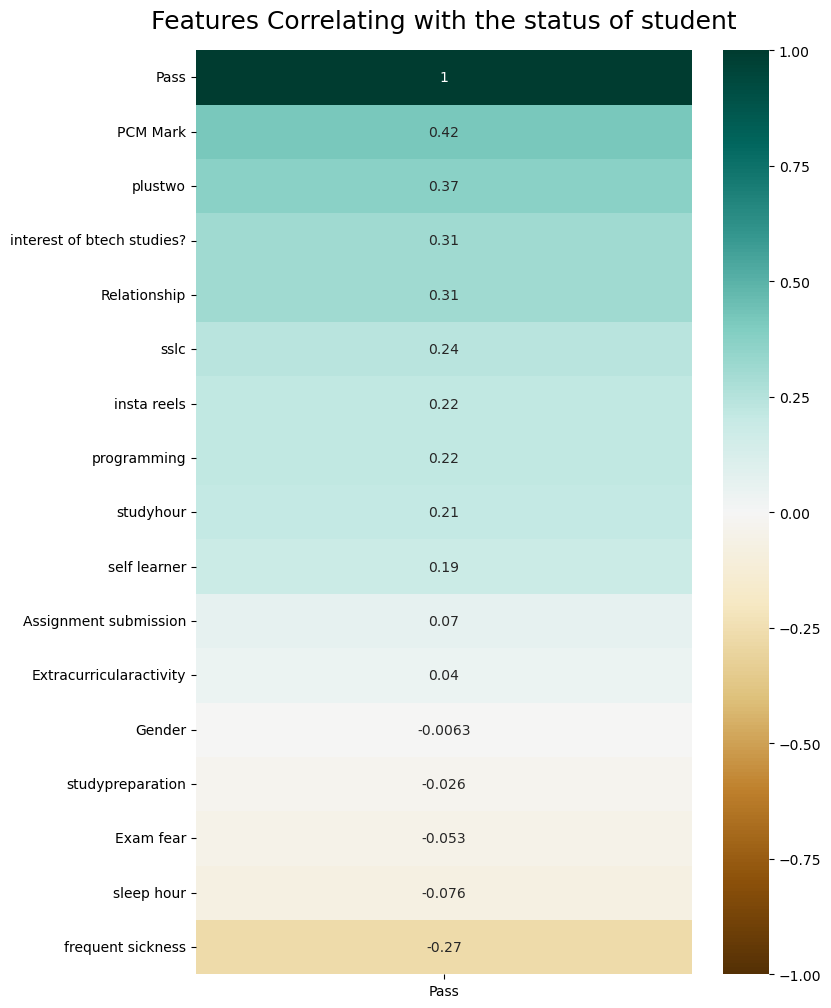

In [7]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['Pass']].sort_values(by='Pass', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with the status of student', fontdict={'fontsize':18}, pad=16);

<AxesSubplot:xlabel='Gender', ylabel='count'>

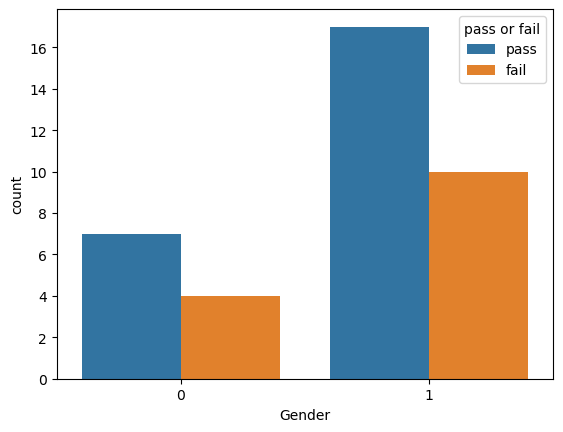

In [8]:
sns.countplot(x = 'Gender',data = df, hue = 'pass or fail')

In [9]:
#plt.figure(figsize=(20, 12))
#plt.subplot(2,3,1)
#sns.boxplot(x = 'Gender', y = 'pass or fail', data = df)
#plt.show()
df.columns


Index(['sslc', 'plustwo', 'sleep hour', 'studyhour',
       'interest of btech studies?', 'Assignment submission', 'Exam fear',
       'PCM Mark', 'insta reels', 'Gender', 'Relationship', 'self learner',
       'frequent sickness', 'Extracurricularactivity', 'studypreparation',
       'Pass', 'pass or fail', 'programming'],
      dtype='object')

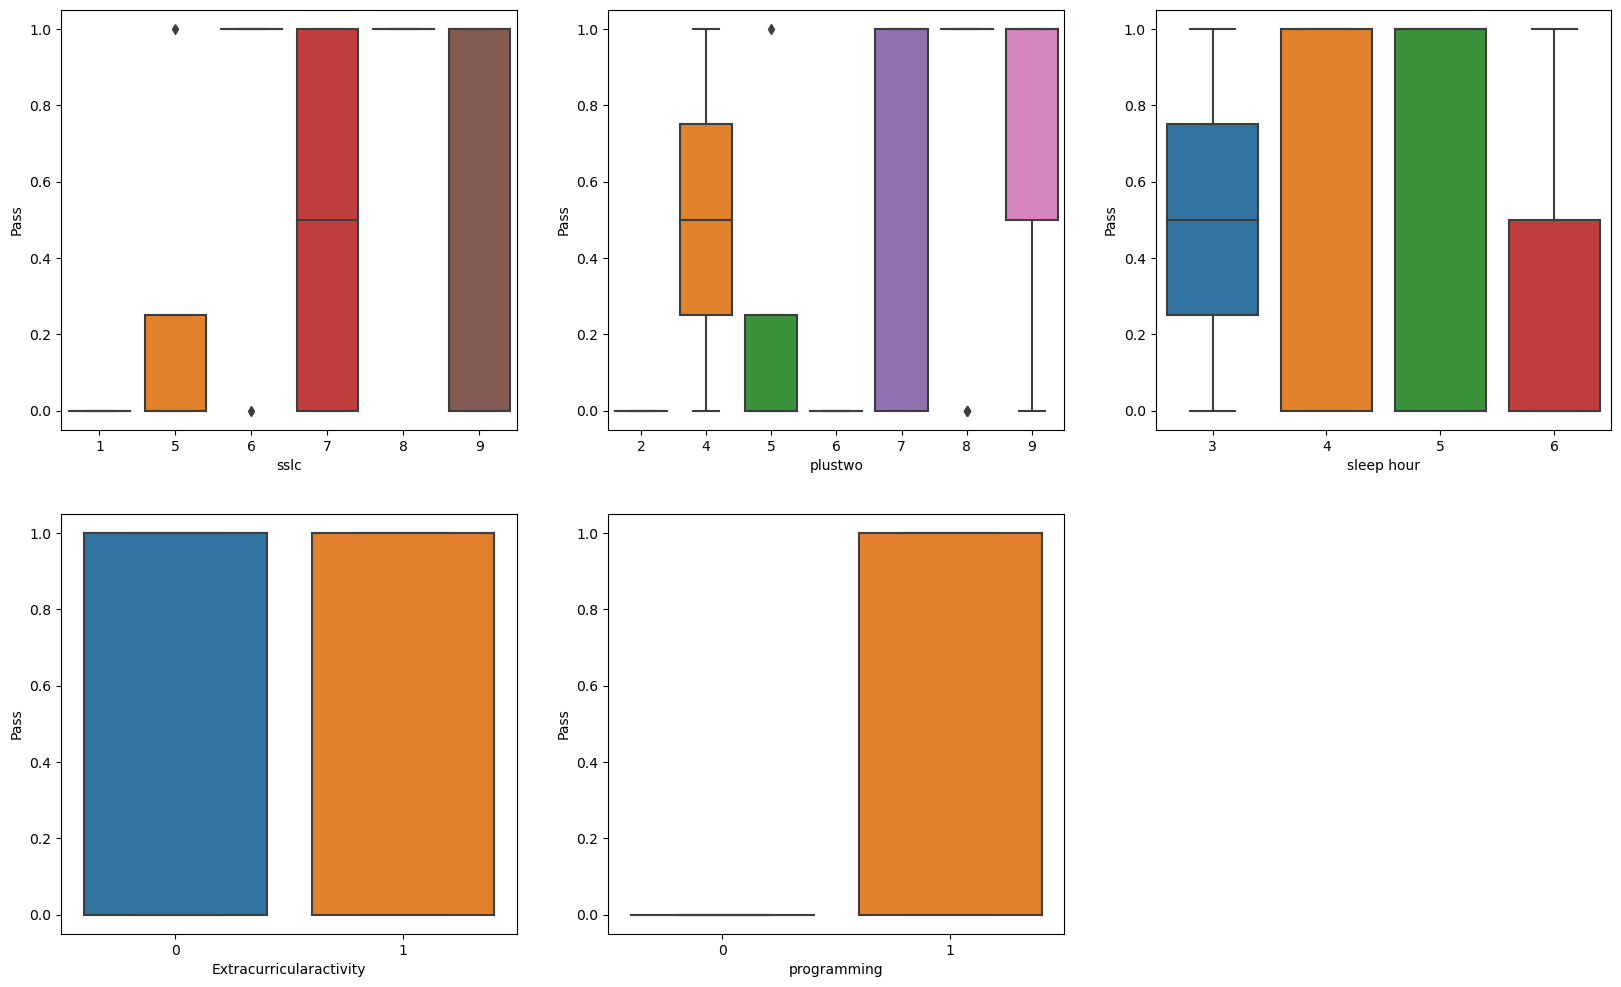

In [10]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'sslc', y = 'Pass', data = df)
plt.subplot(2,3,2)
sns.boxplot(x ='plustwo', y = 'Pass', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'sleep hour', y = 'Pass', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'Extracurricularactivity', y = 'Pass', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'programming', y = 'Pass', data = df)
plt.show()

In [11]:
#sns.lineplot(x = 'Annual', y = 'Score', data = df)

<AxesSubplot:xlabel='sslc', ylabel='Pass'>

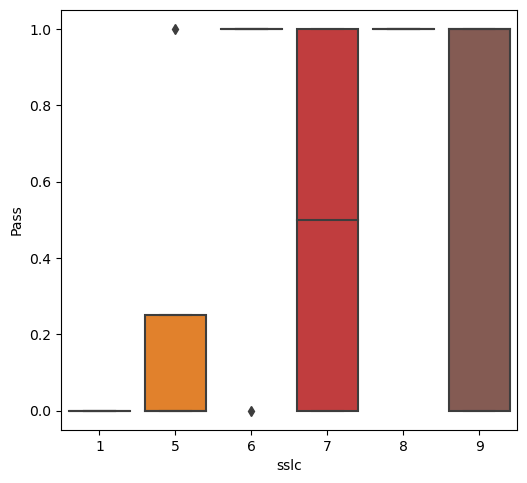

In [3]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'sslc', y = 'Pass', data = df)

<AxesSubplot:xlabel='plustwo', ylabel='Pass'>

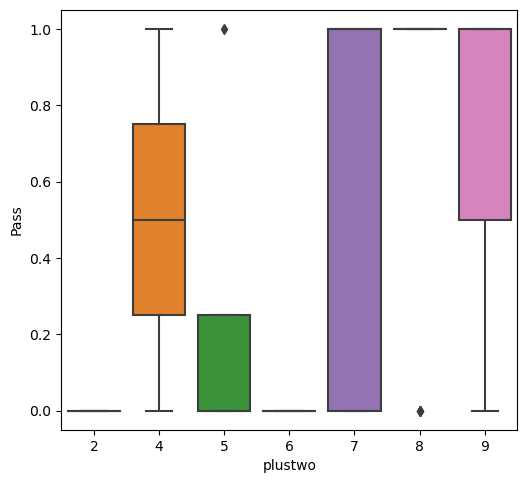

In [4]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'plustwo', y = 'Pass', data = df)

<h1><span style='color:#b846a3;font-family:Comic Sans MS'>1.Logistic Regression</span></h1>

In [12]:
df.head()
df.columns

Index(['sslc', 'plustwo', 'sleep hour', 'studyhour',
       'interest of btech studies?', 'Assignment submission', 'Exam fear',
       'PCM Mark', 'insta reels', 'Gender', 'Relationship', 'self learner',
       'frequent sickness', 'Extracurricularactivity', 'studypreparation',
       'Pass', 'pass or fail', 'programming'],
      dtype='object')

In [13]:
sample=df.drop(['pass or fail'],axis='columns')
sample.head()

,sslc,plustwo,sleep hour,studyhour,interest of btech studies?,Assignment submission,Exam fear,PCM Mark,insta reels,Gender,Relationship,self learner,frequent sickness,Extracurricularactivity,studypreparation,Pass,programming
0,9,8,5,6,1,2,0,5,1,1,1,1,0,1,2,1,1
1,9,8,5,6,1,3,0,8,0,1,1,1,0,1,2,1,1
2,9,5,5,2,1,2,1,5,0,0,1,1,0,1,2,0,1
3,7,7,4,4,1,2,1,6,5,0,1,0,0,0,3,1,1
4,1,2,3,1,0,2,1,1,0,1,0,0,1,1,1,0,0


In [14]:
target=sample['Pass']
target

0     1
1     1
2     0
3     1
4     0
5     1
6     1
7     1
8     0
9     0
10    1
11    1
12    1
13    0
14    0
15    0
16    1
17    0
18    1
19    1
20    0
21    0
22    1
23    0
24    1
25    1
26    1
27    1
28    0
29    1
30    1
31    1
32    0
33    1
34    0
35    1
36    1
37    1
Name: Pass, dtype: int64

In [15]:
X=sample.drop(['Pass'],axis='columns')
y=target

In [16]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression(C=1)

In [182]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=0)

In [183]:
model1.fit(X_train,y_train)

LogisticRegression(C=1)

In [181]:
model1.score(X_test,y_test)


0.8125

**here we get 81% accuracy in Logestic Regression**

In [20]:
logitestictestscore=model1.score(X_test,y_test)


In [21]:
logitestictestscore

0.8333333333333334

# Kfold Cross validation


In [131]:
#from sklearn.model_selection import cross_val_score
#l_scores = cross_val_score(LogisticRegression(),sample,target )
#np.average(l_scores)
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.4)

l_scores=cross_val_score(LogisticRegression(), X, y, cv=cv)
np.average(l_scores)

0.55

In [124]:
logistic_y_predicted = model1.predict(X_test)

In [115]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, logistic_y_predicted)
cm

array([[2, 1],
       [1, 8]], dtype=int64)

<AxesSubplot:>

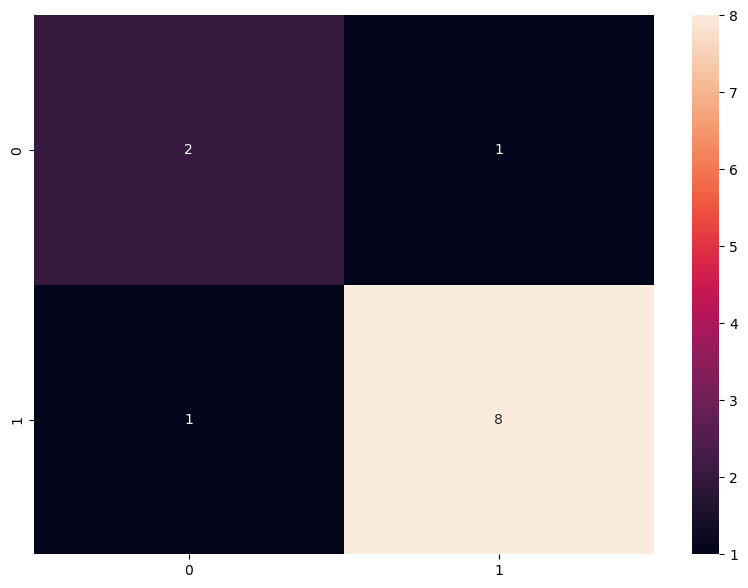

In [25]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)


In [26]:
confusion_matrix(y_test,logistic_y_predicted,labels=(1,0))


array([[8, 1],
       [1, 2]], dtype=int64)

In [27]:

confusion_matrix(y_test,logistic_y_predicted,labels=(1,0)).ravel()

array([8, 1, 1, 2], dtype=int64)

In [28]:
tp, fn, fp, tn = confusion_matrix(y_test, logistic_y_predicted, labels=(1,0)).ravel()

In [29]:
precision = tp/(tp+fp)
precision

0.8888888888888888

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [31]:
precision_score(y_test, logistic_y_predicted)


0.8888888888888888

In [32]:
recall_score(y_test, logistic_y_predicted)

0.8888888888888888

In [33]:
f1_score(y_test,logistic_y_predicted)

0.8888888888888888

In [34]:
accuracy_score(y_test,logistic_y_predicted)

0.8333333333333334

<h1><span style='color:#b846a3;font-family:Comic Sans MS'>2.Decision Tree:</span></h1>

In [184]:
from sklearn import tree




In [185]:
model2 = tree.DecisionTreeClassifier(criterion='entropy')

In [186]:
X_Dec=sample.drop(['Pass'],axis='columns')
y_Dec=target

In [197]:
from sklearn.model_selection import train_test_split
X_Dec_train, X_Dec_test, y_Dec_train, y_Dec_test = train_test_split(X_Dec,y_Dec,test_size=0.4)
model2.fit(X_Dec_train,y_Dec_train)

DecisionTreeClassifier(criterion='entropy')

In [198]:
model2.score(X_Dec_test,y_Dec_test)

0.6875

In [137]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
d_scores = cross_val_score( DecisionTreeClassifier(),X,y )
d_scores

array([0.5       , 0.5       , 0.375     , 0.57142857, 0.71428571])

In [138]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

d_score=cross_val_score(DecisionTreeClassifier(), X_Dec, y_Dec, cv=cv)
np.average(d_score)

0.675

In [139]:
dec_y_predicted = model2.predict(X_test)

In [140]:
from sklearn.metrics import confusion_matrix
cm2= confusion_matrix(y_test, dec_y_predicted)
cm2

array([[2, 1],
       [1, 8]], dtype=int64)

<AxesSubplot:>

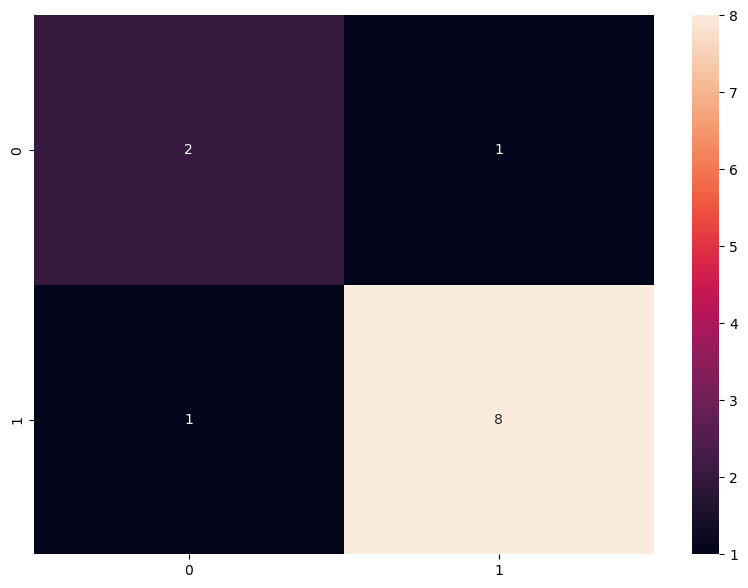

In [141]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm2, annot=True)

In [45]:
confusion_matrix(y_test,dec_y_predicted,labels=(1,0)).ravel()

array([6, 3, 1, 2], dtype=int64)

In [46]:
tp, fn, fp, tn = confusion_matrix(y_test, dec_y_predicted, labels=(1,0)).ravel()

In [47]:
precision_score(y_test, dec_y_predicted)

f1_score(y_test, dec_y_predicted)


0.75

In [48]:
recall_score(y_test, dec_y_predicted)

0.6666666666666666

In [49]:
f1_score(y_test, dec_y_predicted)

0.75

In [50]:
accuracy_score(y_test, dec_y_predicted)

0.6666666666666666

<h1><span style='color:#b846a3;font-family:Comic Sans MS'>3.Support Vector Machine:</span></h1>

In [51]:
from sklearn.svm import SVC
model3 = SVC()

In [143]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=0)

In [53]:
model3.fit(X_train,y_train)

SVC()

In [145]:
model3.score(X_test,y_test)

0.8125

**Tune parameters**

**1. Regularization (C)**

by High C value it may overfit

In [55]:
model_3_1 = SVC(C=1)
model_3_1.fit(X_train, y_train)
model_3_1.score(X_test, y_test)

0.8333333333333334

### 

**2. Gamma**


In [56]:
model_g = SVC(gamma=2**-2)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.6666666666666666

**3. Kernel**

In [57]:
model_linear_kernal = SVC(kernel='linear',gamma=2**-2)
model_linear_kernal.fit(X_train, y_train)

SVC(gamma=0.25, kernel='linear')

In [58]:
model_linear_kernal.score(X_test, y_test)

0.6666666666666666

In [59]:
model_rbf_kernal = SVC(kernel='rbf',gamma=2**-2)
model_rbf_kernal.fit(X_train, y_train)
model_rbf_kernal.score(X_test, y_test)

0.6666666666666666

# Kfold Cross validation

In [84]:
from sklearn.model_selection import ShuffleSplit


cv = ShuffleSplit(n_splits=5, test_size=0.4, random_state=0)

s_score=cross_val_score(SVC(), X, y, cv=cv)
np.average(s_score)

0.6875

In [85]:
svc_y_predicted = model3.predict(X_test)

In [86]:
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y_test, svc_y_predicted)
cm3

array([[1, 2],
       [0, 9]], dtype=int64)

<AxesSubplot:>

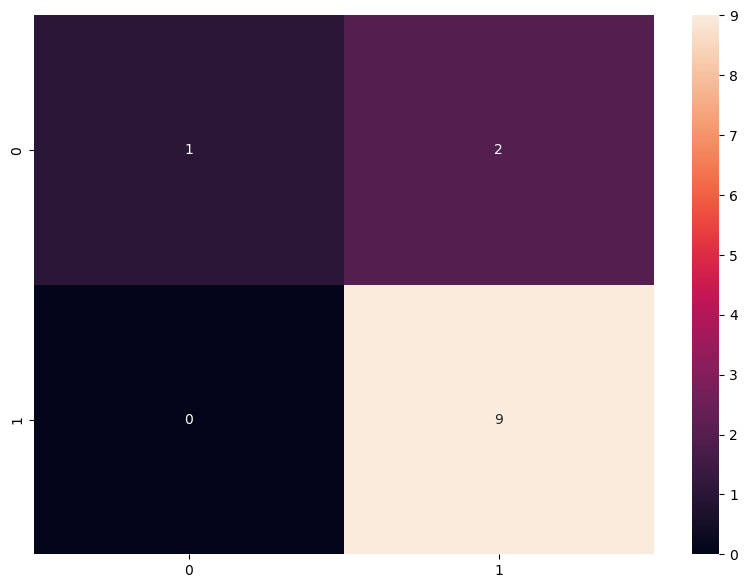

In [87]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm3, annot=True)

In [149]:
confusion_matrix(y_test,svc_y_predicted,labels=(1,0)).ravel()

ValueError: Found input variables with inconsistent numbers of samples: [16, 12]

In [150]:
tp, fn, fp, tn = confusion_matrix(y_test, svc_y_predicted, labels=(1,0)).ravel()

ValueError: Found input variables with inconsistent numbers of samples: [16, 12]

In [151]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [147]:
precision_score(y_test, svc_y_predicted)

ValueError: Found input variables with inconsistent numbers of samples: [16, 12]

In [91]:
recall_score(y_test, svc_y_predicted)

1.0

In [92]:
f1_score(y_test, svc_y_predicted)

0.9

<h1><span style='color:#b846a3;font-family:Comic Sans MS'>4.Random Tree Forest:</span></h1>

In [70]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(n_estimators=12)
model4.fit(X_train, y_train)

RandomForestClassifier(n_estimators=12)

In [71]:
model4.score(X_test,y_test)

0.75

In [72]:
from sklearn.model_selection import ShuffleSplit


cv = ShuffleSplit(n_splits=5, test_size=0.4, random_state=0)

R_score=cross_val_score(RandomForestClassifier(), X, y, cv=cv)
np.average(R_score)

0.675

In [73]:
r_y_predicted=model4.predict(X_test)

In [74]:
from sklearn.metrics import confusion_matrix
cm4=confusion_matrix(y_test,r_y_predicted)
cm4

array([[3, 0],
       [3, 6]], dtype=int64)

<AxesSubplot:>

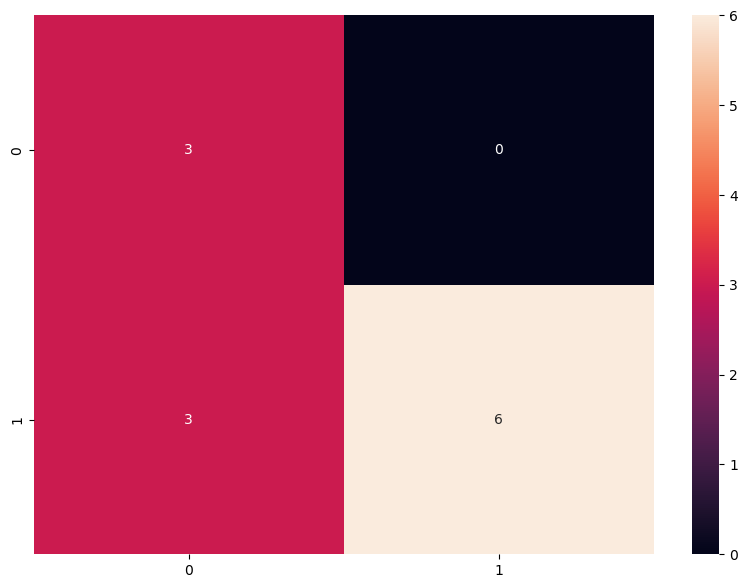

In [75]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm4,annot=True)

In [76]:
precision_score(y_test,r_y_predicted)

1.0

In [77]:
recall_score(y_test, r_y_predicted)

0.6666666666666666

In [78]:
f1_score(y_test, r_y_predicted)

0.8

<h2 style='color:red'>-------------------------------------------</h2>

<h2 style='color:indigo'>Test the Model</h2>

In [79]:
X.columns

Index(['sslc', 'plustwo', 'sleep hour', 'studyhour',
       'interest of btech studies?', 'Assignment submission', 'Exam fear',
       'PCM Mark', 'insta reels', 'Gender', 'Relationship', 'self learner',
       'frequent sickness', 'Extracurricularactivity', 'studypreparation',
       'programming'],
      dtype='object')

In [80]:
result=model1.predict([[9,9,3,3,1,2,1,8,1,0,1,1,1,1,2,1]])

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [81]:
if result[0] == 0:
    print("You have the chance of getting backlog, so study well.")
else:
    print("You don't have the chance for getting supply,but study well for your academic performance")


You don't have the chance for getting supply,but study well for your academic performance


In [82]:
import pickle
with open('ne.sav','wb') as f:
    pickle.dump(model1,f)

<h1><span style='color:#b846a3;font-family:Comic Sans MS'>Our Contribution using Voting Classfier:</span></h1>

In [2]:
import pandas as pd
import numpy as np

df=pd.read_csv('newd.csv')

In [3]:
X=df.drop(['Pass'],axis='columns')
X.columns

Index(['sslc', 'plustwo', 'sleep hour', 'studyhour',
       'interest of btech studies?', 'Assignment submission', 'Exam fear',
       'PCM Mark', 'insta reels', 'Gender', 'Relationship', 'self learner',
       'frequent sickness', 'Extracurricularactivity', 'studypreparation',
       'programming'],
      dtype='object')

In [5]:
y=df['Pass']

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4)

log_clf = LogisticRegression()
svm_clf = SVC()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('svm', svm_clf), ('dt', dt_clf), ('rf', rf_clf)], voting='hard')


voting_clf.fit(X_train, y_train)
voting_clf.score(X_test,y_test)


0.5

In [7]:


predictions = voting_clf.predict(X_test)


In [8]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [ ]:
voting_clf.score(X_test,y_test)


In [ ]:
import pickle
with open('ca3.pkl','wb') as f:
    pickle.dump(voting_clf,f)
    

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.4, random_state=0)

l_scores=cross_val_score(voting_clf(), X, y, cv=cv)
np.average(l_scores)

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
import numpy as np

# create the ShuffleSplit object
cv = ShuffleSplit(n_splits=5, test_size=0.4)

# compute the cross-validation scores
scores = cross_val_score(voting_clf, X, y, cv=cv)

# calculate the mean accuracy
mean_accuracy = np.average(scores)
print(f'Mean accuracy: {mean_accuracy:.3f}')




In [ ]:
voting_y_predicted = voting_clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cmv = confusion_matrix(y_test, voting_y_predicted)
cmv

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
accuracy_score(y_test,voting_y_predicted)

In [ ]:
f1_score(y_test,voting_y_predicted)

In [ ]:
recall_score(y_test, voting_y_predicted)